In [1]:
import torch
#model = YOLO("C:/Users/Owner/Desktop/fyp/Object Detection/yolov5/runs/train/exp/weights/best.pt")
#results = model("C:/Users/Owner/Desktop/fyp/Object Detection/yolov5/test/images/adcs_1_0_png.rf.2f2261b1fb7218f8930c491e9f567d0e.jpg")
model = torch.hub.load('C:/Users/Owner/Desktop/fyp/Object Detection/yolov5', 'custom', path="C:/Users/Owner/Desktop/fyp/Object Detection/yolov5/best.pt",source="local")

YOLOv5  2024-1-20 Python-3.11.7 torch-2.1.2+cu118 CUDA:0 (NVIDIA GeForce RTX 3070, 8192MiB)

Fusing layers... 
Model summary: 267 layers, 46108278 parameters, 0 gradients, 107.6 GFLOPs
Adding AutoShape... 


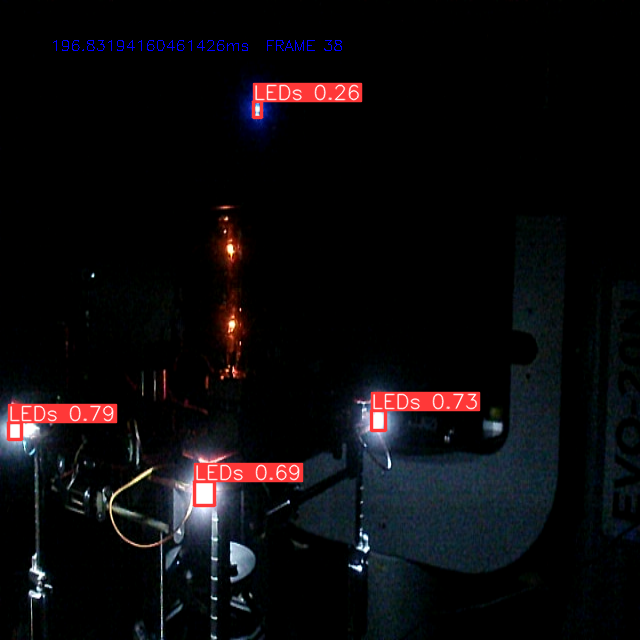

,xmin,ymin,xmax,ymax,confidence,class,name
0,8.105703,422.601868,21.140282,439.084290,0.790184,0,LEDs
1,371.952332,410.213531,385.192444,430.747528,0.732066,0,LEDs
2,194.111267,481.063934,214.980896,505.736664,0.689166,0,LEDs
3,253.703339,101.531418,261.808136,117.579697,0.261794,0,LEDs


In [5]:
import cv2
from PIL import Image
import os

im1 = Image.open('C:/Users/Owner/Desktop/fyp/Labelling/camera_1/adcs_1_38.png')
results = model(im1)
results.show()
results.pandas().xyxy[0]

In [54]:
import cv2
from PIL import Image
import os
import pandas as pd

all_results_df = pd.DataFrame()
folder_path = 'C:/Users/Owner/Desktop/fyp/Labelling/camera_1'
def numeric_part(filename):
    numeric_part = int(filename[7:-4])
    return numeric_part
for filename in sorted(os.listdir(folder_path),key = numeric_part):
    image_path = os.path.join(folder_path, filename)
    im = Image.open(image_path)
    results = model(im)
    results_df = results.pandas().xyxy[0]
    results_df['Image'] = filename
    all_results_df = all_results_df._append(results_df,ignore_index = True)
        

In [55]:
print(all_results_df)

           xmin        ymin        xmax        ymax  confidence  class  name  \
0    304.027161  468.270325  323.957458  491.610901    0.742718      0  LEDs   
1      2.643855  448.116302   21.456921  468.465851    0.725937      0  LEDs   
2    300.516022  470.521973  319.128021  492.400085    0.745169      0  LEDs   
3      1.982862  446.731018   19.858328  467.166443    0.742139      0  LEDs   
4      2.007725  445.358276   19.842743  465.131531    0.760533      0  LEDs   
..          ...         ...         ...         ...         ...    ...   ...   
706    3.406946  460.465546   38.364677  504.817108    0.738597      0  LEDs   
707  347.196411  454.410614  360.741272  472.349518    0.724323      0  LEDs   
708  343.862610  456.504181  356.368713  473.903534    0.722088      0  LEDs   
709    0.810118  458.509155   36.400978  503.401672    0.718487      0  LEDs   
710   53.413403  633.175354   67.415565  639.672546    0.380110      0  LEDs   

              Image  
0      adcs_1_0.p

In [1]:
!python detect.py --weights runs/train/Finalmodel(ssize)/weights/best.pt --img 640 --source data/camera_1 --save-txt

detect: weights=['runs/train/Finalmodel(ssize)/weights/best.pt'], source=data/camera_1, data=data\coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs\detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
fatal: cannot change to 'C:\Users\Owner\Desktop\fyp\Object': No such file or directory
YOLOv5  2024-1-20 Python-3.11.7 torch-2.1.2+cu118 CUDA:0 (NVIDIA GeForce RTX 3070, 8192MiB)

Fusing layers... 
Model summary: 157 layers, 1760518 parameters, 0 gradients, 4.1 GFLOPs
image 1/667 C:\Users\Owner\Desktop\fyp\Object Detection\yolov5\data\camera_1\adcs_1_1000 _ 1708500301.517992.png: 640x640 3 LEDss, 4.0ms
image 2/667 C:\Users\Owner\Desktop\fyp\Object Detection\yolov5\data\camera_1\adcs_1_334 _ 170850

In [ ]:
import cv2
import os
import pandas as pd

# Replace strings with directories of the images, labels and final results
############################################################################    
image_directory = "C:/Users/Owner/Desktop/fyp/Labelling/camera_1"  # Directory to image
label_csv_path = "C:/Users/Owner/Desktop/fyp/Object Detection/yolov5/runs/detect/exp/labels.csv"  # Path to label CSV file
results_directory = "C:/Users/Owner/Desktop/fyp/Labelling/camera_1_annotated"  # Directory for results
############################################################################

def numeric_part(filename):
    numeric_part = int(filename[7:-4])
    return numeric_part

# Read label data from CSV into a Pandas DataFrame
labels_df = pd.read_csv(label_csv_path)

for image_filename in sorted(os.listdir(image_directory), key=numeric_part):
    # Image
    img_path = os.path.join(image_directory, image_filename)
    img = cv2.imread(img_path)
    dh, dw, _ = img.shape

    # Extract label information from DataFrame based on the image filename
    label_info = labels_df.loc[labels_df['filename'] == image_filename.replace(".png", ".txt")] # image index
    # Drawing Bounding Boxes
    for led_id, x, y, w, h, conf in label_info.itertuples(index=False):
        l = int((x - w / 2) * dw)
        r = int((x + w / 2) * dw)
        t = int((y - h / 2) * dh)
        b = int((y + h / 2) * dh)

        if l < 0:
            l = 0
        if r > dw - 1:
            r = dw - 1
        if t < 0:
            t = 0
        if b > dh - 1:
            b = dh - 1

        cv2.rectangle(img, (l, t), (r, b), (0, 0, 255), 1)
        #cv2.putText(img, led_id, (l, b), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 1)
        #cv2.putText(img, conf, (t, r), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 255), 1) #confidence level

    output_path = os.path.join(results_directory, image_filename)
    cv2.imwrite(output_path, img)
